In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
def correlacion_pearson(data_frame, columna1, columna2):
    return np.corrcoef(data_frame[columna1], data_frame[columna2])[0,1];

# Experimentos del TP de Subset Sum
En esta carpeta de Jupyer vamos a poner lo relativo a realizar la experimentación computacional.
- **Asegurarse de correr los experimentos en el notebook Experimentos antes de utilizar este notebook.**
- En este archivo se lee el output de los experimentos y se muestra de manera gráfica esos resultados.

# Datasets
Para los experimentos se crean las siguientes familias de instancias para evaluar los distintos métodos.
1. **mejor-caso-BT**: Instancias de mejor caso para el algoritmo de BT con podas.
2. **mejor-caso-BT-O**: Inancias de mejor caso para el algoritmo de BT con poda de optimalidad.
3. **peor-caso-BT**: Instancias de peor caos para el algoritmo de BT con podas.
4. **bajo-contagio**: Son instancias con n = 1..150 y con densidad baja de contagio. Significa que se van a sumar varios beneficios antes de poder alcanzar el limite de contagio
5. **dinamica**: Instancias con n y M variando para probar el algoritmo de PD.
6. **alto-contagio**: Son instancias con n = 1..150 y con densidad alta de contagio, es decir, cada $c_i$ es más alto en comparación con $b_i$

# Métodos
Los métodos evaluados en este notebook son los siguientes:
- **FB**: Fuerza Bruta.
- **BT**: Backtracking con podas por optimalidad y factibilidad.
- **BT-F**: Backtracking solamente con poda por factibilidad.
- **BT-O**: Backtracking solamente con poda por optimalidad.
- **DP**: Programación dinámica.

# Experimentos
Leemos el dataframe con todos los resultados.

In [5]:
df_resultados = pd.read_csv("resultados/resultados.csv");
df_resultados


,dataset,cantidad_locales,limite_contagio,metodo,tiempo
0,alto_contagio,0.0,1,FB,0.002965
1,alto_contagio,1.0,4,FB,0.001914
2,alto_contagio,2.0,9,FB,0.002490
3,alto_contagio,3.0,16,FB,0.003607
4,alto_contagio,4.0,25,FB,0.002751
...,...,...,...,...,...
33541,alto_contagio,200.0,40000,DP,88.409350
33542,alto_contagio,200.0,40000,DP,88.476750
33543,alto_contagio,200.0,40000,DP,89.253900
33544,alto_contagio,200.0,40000,DP,88.272300


## Experimento 1: Complejidad de Fuerza Bruta
En este experimento evaluamos el método FB con los datasets densidad-alta y densidad-baja. La hipótesis es que siempre va a tener un comportamiento exponencial porque tiene peor y mejor caso iguales.

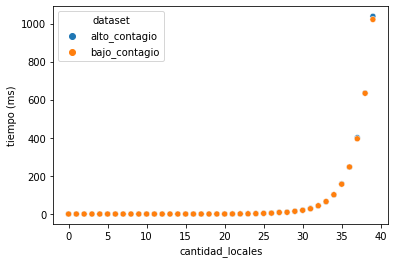

In [54]:
# Graficamos los tiempos de ejecución de cada dataset en función de la cantidad de locales.
df_complejidad_FB = df_resultados[df_resultados["metodo"]=="FB"].copy();
fig = sns.scatterplot(data=df_complejidad_FB, x='cantidad_locales', y='tiempo', hue='dataset');
fig.set(xlabel='cantidad_locales', ylabel='tiempo (ms)');
plt.savefig("graficos/fb-densidades.svg");

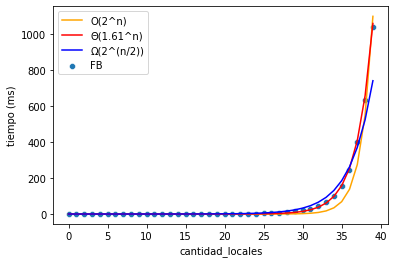

In [61]:
# Comparamos el dataset densidad-alta contra una función exponencial.
df_complejidad_FB = df_resultados[(df_resultados["metodo"]=="FB") & (df_resultados["dataset"]=="alto_contagio")].copy();
df_complejidad_FB["tiempo_peor_caso"] = 2.0 ** (df_complejidad_FB["cantidad_locales"])* 0.000000002 ;#Exponencial
df_complejidad_FB["tiempo_logrado"] = 1.61 ** (df_complejidad_FB["cantidad_locales"])* 0.0000091 ;#Exponencial
df_complejidad_FB["tiempo_mejor_caso"] = 2.0 ** (df_complejidad_FB["cantidad_locales"]/2)* 0.001 ;#Exponencial
fig = sns.scatterplot(data=df_complejidad_FB, x='cantidad_locales', y='tiempo');
fig = sns.lineplot(data=df_complejidad_FB, x='cantidad_locales', y='tiempo_peor_caso', color="orange");
fig = sns.lineplot(data=df_complejidad_FB, x='cantidad_locales', y='tiempo_logrado', color="red");
fig = sns.lineplot(data=df_complejidad_FB, x='cantidad_locales', y='tiempo_mejor_caso', color="blue");
fig.legend(labels=['O(2^n)','Θ(1.61^n)','Ω(2^(n/2))','FB']);
fig.set(xlabel='cantidad_locales', ylabel='tiempo (ms)');
plt.savefig("graficos/fb-complejidad.svg")

Índice de correlación de Pearson: 0.9845721265811636


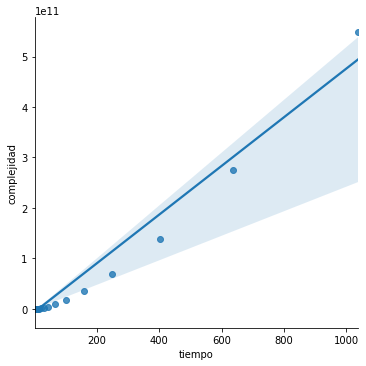

In [62]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_complejidad_FB = df_resultados[(df_resultados["metodo"]=="FB") & (df_resultados["dataset"]=="alto_contagio")].copy();
df_complejidad_FB["complejidad"] = 2.0 ** df_complejidad_FB["cantidad_locales"];
fig = sns.lmplot(data=df_complejidad_FB, x="tiempo", y="complejidad");
plt.savefig("graficos/fb-correlacion-peor-caso.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_complejidad_FB, "tiempo", "complejidad"));

Índice de correlación de Pearson: 0.9999146413674718


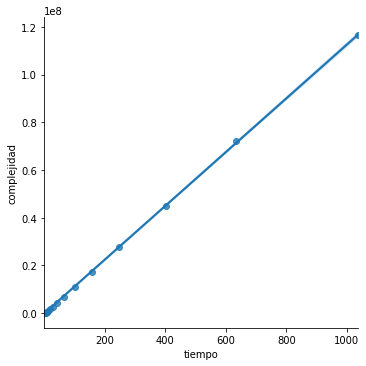

In [63]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_complejidad_FB = df_resultados[(df_resultados["metodo"]=="FB") & (df_resultados["dataset"]=="alto_contagio")].copy();
#Por el análisis de complejidad teorico que hicimos, sabemos que nuestra complejidad se encuentra entre O(2^(n/2)) y O(2^n)
#En este caso encontramos que la constante sqrt(2)< 1.61 < 2 es la que más se adecua a la complejidad lograda
df_complejidad_FB["complejidad"] = 1.61 ** df_complejidad_FB["cantidad_locales"];
fig = sns.lmplot(data=df_complejidad_FB, x="tiempo", y="complejidad");
plt.savefig("graficos/fb-correlacion-constante-encontrada.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_complejidad_FB, "tiempo", "complejidad"));

## Experimento 2: Complejidad de Backtracking
En este experimento evaluamos el método BT con los datasets mejor-caso-bt, mejor-caso-bt-o y peor-caso-bt. La hipótesis es que va a tener un comportamiento exponencial en el peor caso, cuadrático en el caso intermedio y lineal en el mejor caso.

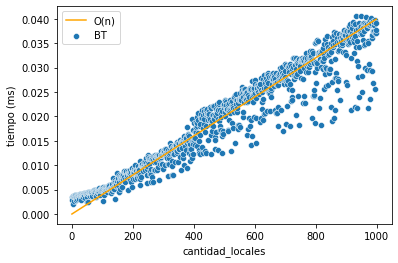

In [64]:
#análisis para el mejor caso
df_BT_mejor_caso = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "mejor-caso-BT")].copy();
df_BT_mejor_caso["tiempo_esperado"] = df_BT_mejor_caso["cantidad_locales"] * 0.00004; # Lineal
fig = sns.scatterplot(data=df_BT_mejor_caso, x='cantidad_locales', y='tiempo');
fig = sns.lineplot(data=df_BT_mejor_caso, x='cantidad_locales', y='tiempo_esperado', color="orange");
fig.legend(labels=['O(n)','BT']);
fig.set(xlabel='cantidad_locales', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-complejidad-mejor-caso.svg");

Índice de correlación de Pearson: 0.9609835801689897


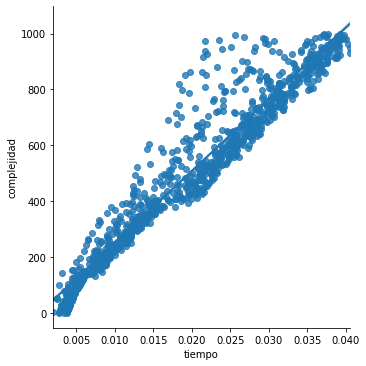

In [65]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_BT_mejor_caso = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "mejor-caso-BT")].copy();
df_BT_mejor_caso["complejidad"] = df_BT_mejor_caso["cantidad_locales"];
fig = sns.lmplot(data=df_BT_mejor_caso, x="tiempo", y="complejidad");
plt.savefig("graficos/bt-correlacion-mejor-caso.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_BT_mejor_caso, "tiempo", "complejidad"));

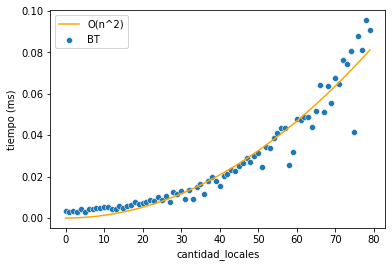

In [66]:
#análisis para el caso intermedio
df_BT_caso_intermedio = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "caso-intermedio-BT") & (df_resultados["cantidad_locales"] < 80)].copy();
df_BT_caso_intermedio["tiempo_esperado"] = (df_BT_caso_intermedio["cantidad_locales"])**2 * 0.000013; # Lineal
fig = sns.scatterplot(data=df_BT_caso_intermedio, x='cantidad_locales', y='tiempo');
fig = sns.lineplot(data=df_BT_caso_intermedio, x='cantidad_locales', y='tiempo_esperado', color="orange");
fig.legend(labels=['O(n^2)','BT']);
fig.set(xlabel='cantidad_locales', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-complejidad-caso-intermedio.svg");

Índice de correlación de Pearson: 0.9691006031968618


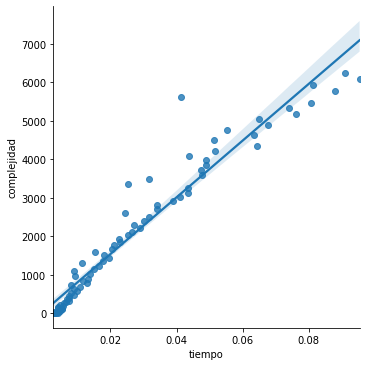

In [67]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_BT_caso_intermedio = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "caso-intermedio-BT") & (df_resultados["cantidad_locales"] < 80)].copy();
df_BT_caso_intermedio["complejidad"] = (df_BT_caso_intermedio["cantidad_locales"])**2.0;
fig = sns.lmplot(data=df_BT_caso_intermedio, x="tiempo", y="complejidad");
plt.savefig("graficos/bt-correlacion-caso-promedio.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_BT_caso_intermedio, "tiempo", "complejidad"));

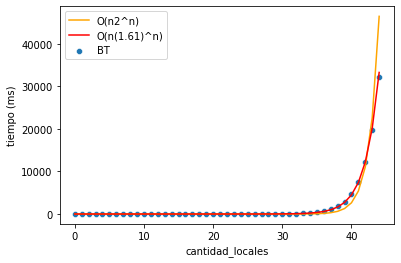

In [68]:
df_BT_peor_caso = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "peor-caso-BT")].copy();
df_BT_peor_caso["tiempo_esperado"] = (df_BT_peor_caso["cantidad_locales"]) * 2.0**df_BT_peor_caso["cantidad_locales"] *0.00000000006; # Exponencial.
df_BT_peor_caso["tiempo_logrado"] = (df_BT_peor_caso["cantidad_locales"]) * 1.61**df_BT_peor_caso["cantidad_locales"] *0.0000006; # Exponencial.
fig = sns.scatterplot(data=df_BT_peor_caso, x='cantidad_locales', y='tiempo');
fig = sns.lineplot(data=df_BT_peor_caso, x='cantidad_locales', y='tiempo_esperado', color="orange");
fig = sns.lineplot(data=df_BT_peor_caso, x='cantidad_locales', y='tiempo_logrado', color="red");
fig.legend(labels=['O(n2^n)','O(n(1.61)^n)','BT']);
fig.set(xlabel='cantidad_locales', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-complejidad-peor-caso.svg");

Índice de correlación de Pearson: 0.9826139617543684


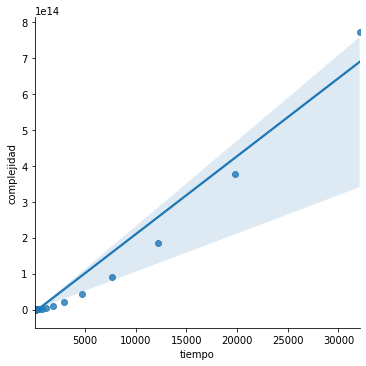

In [69]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_BT_peor_caso = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "peor-caso-BT")].copy();
df_BT_peor_caso["complejidad"] =(df_BT_peor_caso["cantidad_locales"]) * 2.0 ** df_BT_peor_caso["cantidad_locales"];
fig = sns.lmplot(data=df_BT_peor_caso, x="tiempo", y="complejidad");
plt.savefig("graficos/bt-correlacion-peor-caso.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_BT_peor_caso, "tiempo", "complejidad"));

Índice de correlación de Pearson: 0.9998149854812577


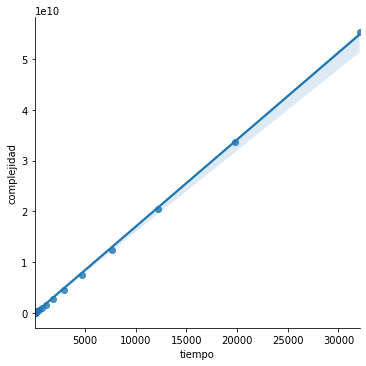

In [70]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_BT_peor_caso = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "peor-caso-BT")].copy();
#Como vimos teoricamente la complejidad del peor caso si bien es n*2^n, encontramos que la siguiente constante es la que más se adecúa a la complejidad obtenida
df_BT_peor_caso["complejidad"] =(df_BT_peor_caso["cantidad_locales"]) * 1.61 ** df_BT_peor_caso["cantidad_locales"];
fig = sns.lmplot(data=df_BT_peor_caso, x="tiempo", y="complejidad");
plt.savefig("graficos/bt-correlacion-peor-caso-ajustada.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_BT_peor_caso, "tiempo", "complejidad"));

## Experimento 3: Análisis de las podas
Analizar Backtracking con y sin las podas para distintas densidades.

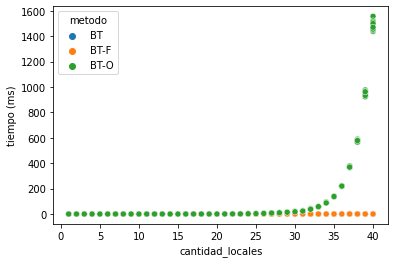

In [85]:
#contrastamos el algoritmo con cada poda
df_BT_alto_contagio = df_resultados[((df_resultados["metodo"]=="BT") | (df_resultados["metodo"]=="BT-F") | (df_resultados["metodo"]=="BT-O")) & (df_resultados["dataset"] == "alto_contagio") & (df_resultados["cantidad_locales"] <=40)].copy();
df_BT_alto_contagio = df_BT_alto_contagio[df_BT_alto_contagio["tiempo"] < 2000]; # Sacamos outliers.
fig = sns.scatterplot(data=df_BT_alto_contagio, x='cantidad_locales', y='tiempo', hue='metodo');
fig.set(xlabel='cantidad_locales', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-podas-alta.svg");

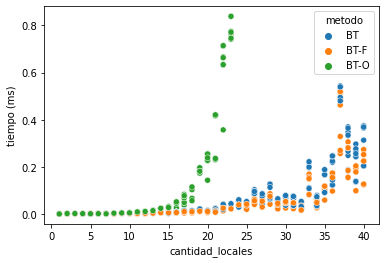

In [86]:
# Acercamos un poco la lupa para ver la diferencia entre BT y BT-F .
fig = sns.scatterplot(data=df_BT_alto_contagio[df_BT_alto_contagio["tiempo"]<1], x='cantidad_locales', y='tiempo', hue='metodo');
fig.set(xlabel='cantidad_locales', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-podas-alta-zoom.svg");

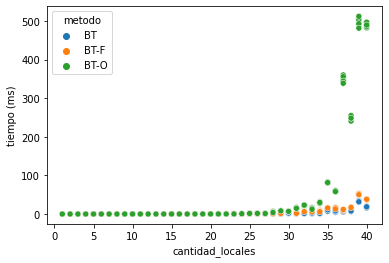

In [87]:
df_BT_bajo_contagio = df_resultados[((df_resultados["metodo"]=="BT") | (df_resultados["metodo"]=="BT-F") | (df_resultados["metodo"]=="BT-O")) & (df_resultados["dataset"] == "bajo_contagio")& (df_resultados["cantidad_locales"] <=40)].copy();
fig = sns.scatterplot(data=df_BT_bajo_contagio, x='cantidad_locales', y='tiempo', hue='metodo');
fig.set(xlabel='cantidad_locales', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-podas-baja.svg");

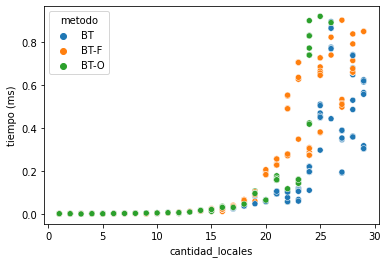

In [88]:
# Acercamos un poco la lupa para ver la diferencia entre BT y BT-O.
df_BT_bajo_contagio = df_resultados[((df_resultados["metodo"]=="BT") | (df_resultados["metodo"]=="BT-F") | (df_resultados["metodo"]=="BT-O")) & (df_resultados["dataset"] == "bajo_contagio")& (df_resultados["cantidad_locales"] <=40)].copy();
fig = sns.scatterplot(data=df_BT_bajo_contagio[df_BT_bajo_contagio["tiempo"]<1], x='cantidad_locales', y='tiempo', hue='metodo')
fig.set(xlabel='cantidad_locales', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-podas-baja-zoom.svg");

# Experimento 4: Complejidad de programación dinámica
En este experimento analizamos el tiempo de ejecución real del algoritmo de programación dinámica y lo comparamos con su cota teórica para ver si en la práctica se comporta de manera similar.

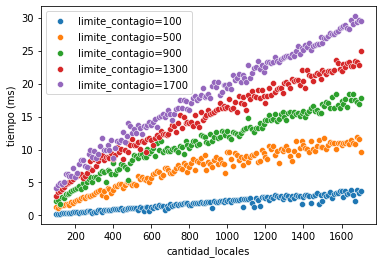

In [71]:
# Graficamos la evolución del tiempo de ejecución en función de n, con cortes en distintos W.
df_dinamica = df_resultados[(df_resultados["metodo"]=="DP") & (df_resultados["dataset"]=="variacion_n_m")].copy();
fig = sns.scatterplot(data=df_dinamica[df_dinamica["limite_contagio"]==100], x='cantidad_locales', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["limite_contagio"]==500], x='cantidad_locales', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["limite_contagio"]==900], x='cantidad_locales', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["limite_contagio"]==1300], x='cantidad_locales', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["limite_contagio"]==1700], x='cantidad_locales', y='tiempo');
fig.legend(labels=['limite_contagio=100','limite_contagio=500','limite_contagio=900','limite_contagio=1300','limite_contagio=1700']);
fig.set(xlabel='cantidad_locales', ylabel='tiempo (ms)');
plt.savefig("graficos/dp-n.svg");

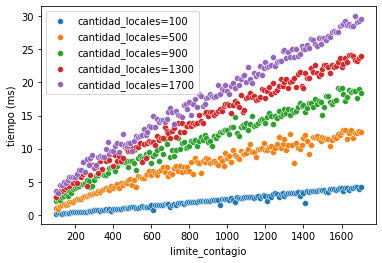

In [72]:
# Graficamos la evolución del tiempo de ejecución en función del limite de contagio, con cortes en distintas cantidad de locales.
df_dinamica = df_resultados[(df_resultados["metodo"]=="DP") & (df_resultados["dataset"]=="variacion_n_m")].copy();
fig = sns.scatterplot(data=df_dinamica[df_dinamica["cantidad_locales"]==100], x='limite_contagio', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["cantidad_locales"]==500], x='limite_contagio', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["cantidad_locales"]==900], x='limite_contagio', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["cantidad_locales"]==1300], x='limite_contagio', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["cantidad_locales"]==1700], x='limite_contagio', y='tiempo');
fig.legend(labels=['cantidad_locales=100','cantidad_locales=500','cantidad_locales=900','cantidad_locales=1300','cantidad_locales=1700']);
fig.set(xlabel='limite_contagio', ylabel='tiempo (ms)');
plt.savefig("graficos/dp-M.svg");

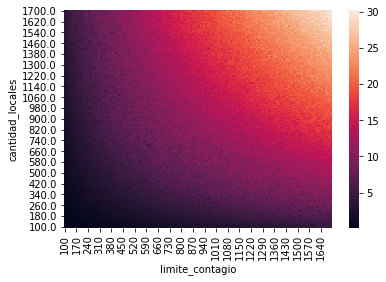

In [6]:
# Graficamos el tiempo de ejecución de las distintas instancias ordenadas por cantidad de locales y limite de contagio.
df_dinamica = df_resultados[(df_resultados["metodo"]=="DP") & (df_resultados["dataset"]=="variacion_n_m")].copy();
df_heatmap = df_dinamica.pivot_table(index='cantidad_locales', columns='limite_contagio', values='tiempo', aggfunc=np.mean);
fig = sns.heatmap(df_heatmap);
fig.invert_yaxis();
plt.savefig("graficos/dp-heatmap.svg");

Índice de correlación de Pearson: 0.985977492952224


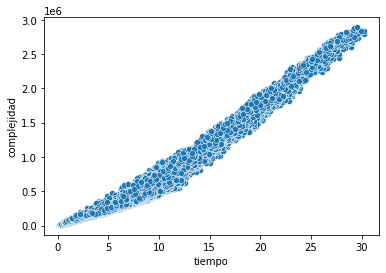

In [22]:
# Graficamos los tiempos de ejecución de la serie de instancias L1, ..., Ln vs la complejidad esperada.
df_dinamica = df_resultados[(df_resultados["metodo"]=="DP") & (df_resultados["dataset"]=="variacion_n_m")].copy();
df_dinamica["complejidad"] = df_dinamica["cantidad_locales"] * df_dinamica["limite_contagio"];
fig = sns.scatterplot(data=df_dinamica, x="tiempo", y="complejidad");
plt.savefig("graficos/dp-correlacion.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_dinamica, "tiempo", "complejidad"));

## Experimento 5: Comparación Backtracking y Programación Dinámica
En este experimento se trata de buscar para qué casos funciona mejor cada técnica. Por ejemplo, vamos a ejecutar BT y Dinámica sobre los datasets alto_contagio y bajo_contagio.

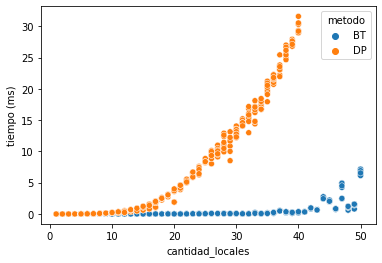

In [89]:
df_alto_contagio = df_resultados[((df_resultados["metodo"]=="BT") | (df_resultados["metodo"]=="DP")) & (df_resultados["dataset"] == "alto_contagio")].copy();
df_alto_contagio = df_alto_contagio[df_alto_contagio["cantidad_locales"]<=50];
fig = sns.scatterplot(data=df_alto_contagio, x='cantidad_locales', y='tiempo', hue='metodo');
fig.set(xlabel='cantidad_locales', ylabel='tiempo (ms)');
plt.savefig("graficos/comparacion-bt-dp-alto.svg");

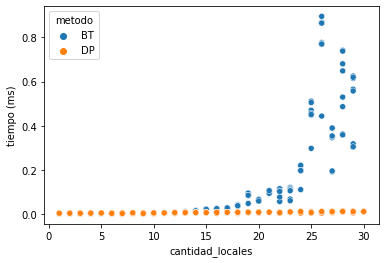

In [101]:
df_bajo_contagio = df_resultados[((df_resultados["metodo"]=="BT") | (df_resultados["metodo"]=="DP")) & (df_resultados["dataset"] == "bajo_contagio")& (df_resultados["cantidad_locales"] <=30)].copy();
df_bajo_contagio = df_bajo_contagio[ df_bajo_contagio["tiempo"]<=1];
fig = sns.scatterplot(data=df_bajo_contagio, x='cantidad_locales', y='tiempo', hue='metodo');
fig.set(xlabel='cantidad_locales', ylabel='tiempo (ms)');
plt.savefig("graficos/comparacion-bt-dp-baja-zoom.svg");

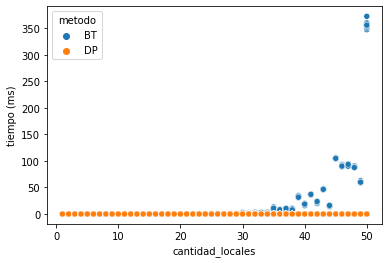

In [102]:
df_bajo_contagio = df_resultados[((df_resultados["metodo"]=="BT") | (df_resultados["metodo"]=="DP")) & (df_resultados["dataset"] == "bajo_contagio")].copy();
df_bajo_contagio = df_bajo_contagio[ df_bajo_contagio["cantidad_locales"]<=50];
fig = sns.scatterplot(data=df_bajo_contagio, x='cantidad_locales', y='tiempo', hue='metodo');
fig.set(xlabel='cantidad_locales', ylabel='tiempo (ms)');
plt.savefig("graficos/comparacion-bt-dp-baja.svg");